In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt

In [ ]:
import time
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train8= pd.read_csv('/content/drive/MyDrive/Project2/Dataset/multi class 7/train.csv')
test8= pd.read_csv('/content/drive/MyDrive/Project2/Dataset/multi class 7/test.csv')

# Data **Visulization**

DDoS          177426
DoS            42363
Mirai          13595
Benign          5738
Spoofing        2532
Recon           1790
Web              136
BruteForce        69
Name: label, dtype: int64


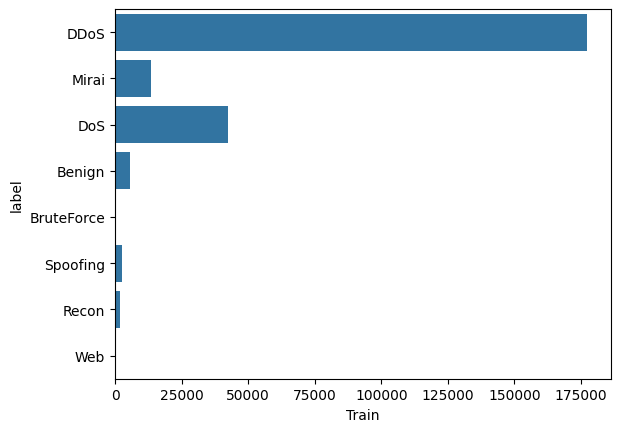

In [ ]:
ax = sns.countplot(train8.label)
plt.xlabel('Train')
print(train8.label.value_counts())

DDoS          170540
DoS            40854
Mirai          13473
Benign          5481
Spoofing        2435
Recon           1744
Web              139
BruteForce        79
Name: label, dtype: int64


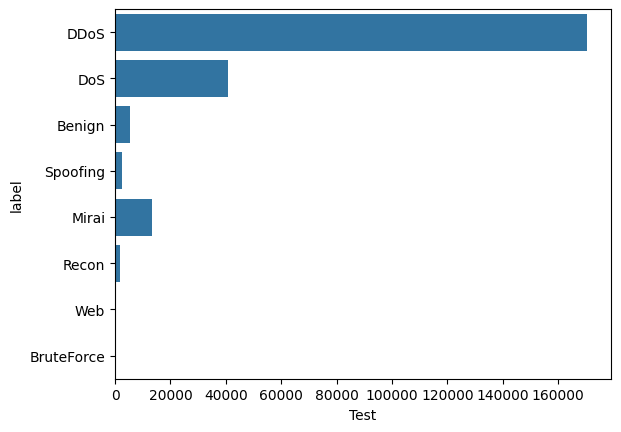

In [ ]:
ax = sns.countplot(test8.label)
plt.xlabel('Test')
print(test8.label.value_counts())

# **Data Pre-Processing**

In [ ]:
train8=train8.drop(['ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 'IRC'], axis=1)
test8=test8.drop(['ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 'IRC'], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_train= train8['label']
x_train = train8.drop(['label'], axis=1)
y_test =test8['label']
x_test= test8.drop(['label'], axis=1)

              precision    recall  f1-score   support

      Benign    0.89284   0.96679   0.92835      5481
  BruteForce    1.00000   0.12658   0.22472        79
        DDoS    0.99946   0.99991   0.99968    170540
         DoS    0.99976   0.99931   0.99953     40854
       Mirai    0.99985   0.99866   0.99926     13473
       Recon    0.86846   0.76089   0.81112      1744
    Spoofing    0.86128   0.83121   0.84598      2435
         Web    0.84615   0.07914   0.14474       139

    accuracy                        0.99459    234745
   macro avg    0.93347   0.72031   0.74417    234745
weighted avg    0.99455   0.99459   0.99421    234745



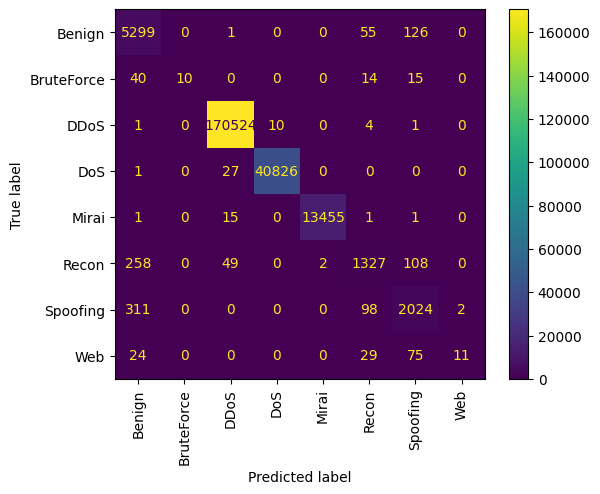

In [ ]:
#random forest classification with all features


#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

print(classification_report(y_test, clf_rf.predict(x_test), digits=5))
ConfusionMatrixDisplay.from_estimator(clf_rf , x_test, y_test,xticks_rotation='vertical')
plt.show()


In [ ]:
#Univariate feature selection and random forest classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 16 features
select_feature = SelectKBest(chi2, k=16).fit(x_train, y_train)

In [ ]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [5.34449275e+07 1.79101720e+11 1.20810723e+06 2.74376191e+05
 8.22756078e+07 8.22756078e+07 2.34339359e-01 7.87217403e+03
 5.11691924e+03 7.10734542e+03 7.32427182e+03 3.84365834e+04
 6.88891209e+03 9.70626024e+03 5.83200745e+03 3.90283462e+07
 2.32804305e+08 7.65587677e+02 5.81768879e+04 4.05276374e+02
 2.11808696e+04 8.97798945e+03 1.22903968e+04 3.73242929e-01
 3.71102246e+02 1.47374049e+04 1.00334567e-01 1.00334567e-01
 4.66617480e+08 3.16203561e+07 1.21116893e+08 4.44054252e+07
 5.36880556e+07 4.48605924e+07 1.67439601e+08 2.22101938e+00
 6.98891481e+05 7.58327490e+07 9.18934263e+10 6.33163188e+04
 9.92147122e+01]
Feature list: Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS',
       'DNS', 'SSH', 'TCP', 'UDP', 'DHCP', 'ARP', 'IC

              precision    recall  f1-score   support

      Benign    0.89837   0.96278   0.92946      5481
  BruteForce    1.00000   0.46835   0.63793        79
        DDoS    0.99959   0.99988   0.99973    170540
         DoS    0.99973   0.99944   0.99958     40854
       Mirai    0.99970   0.99941   0.99955     13473
       Recon    0.83937   0.77007   0.80323      1744
    Spoofing    0.86719   0.82053   0.84322      2435
         Web    0.93333   0.20144   0.33136       139

    accuracy                        0.99469    234745
   macro avg    0.94216   0.77774   0.81801    234745
weighted avg    0.99465   0.99469   0.99446    234745



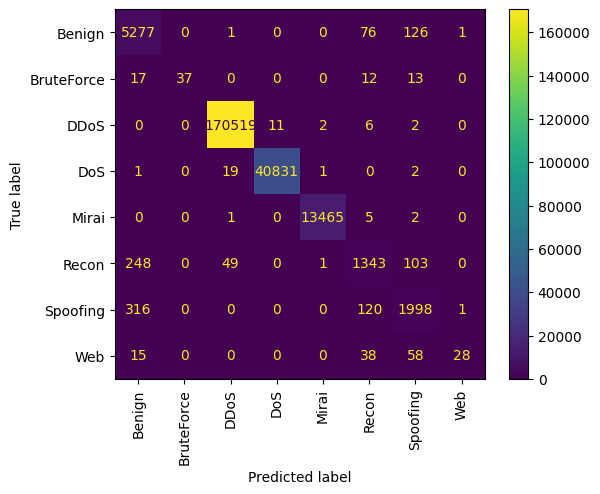

In [ ]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)

print(classification_report(y_test, clf_rf_2.predict(x_test_2), digits=5))
ConfusionMatrixDisplay.from_estimator(clf_rf_2 , x_test_2, y_test,xticks_rotation='vertical')
plt.show()

In [ ]:
#Recursive feature elimination with cross validation and random forest classification

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_cv = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_cv, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Rate', 'Srate',
       'urg_count', 'rst_count', 'Tot sum', 'Min', 'Max', 'AVG', 'Tot size',
       'IAT', 'Magnitue', 'Variance', 'Weight'],
      dtype='object')


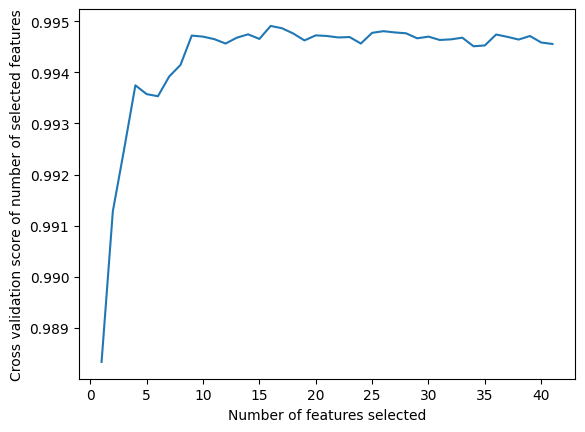

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
x_train_3 = train8[['flow_duration', 'Header_Length', 'Protocol Type', 'Rate', 'Srate',
       'urg_count', 'rst_count', 'Tot sum', 'Min', 'Max', 'AVG', 'Tot size',
       'IAT', 'Magnitue', 'Variance', 'Weight']]
x_test_3 = test8[['flow_duration', 'Header_Length', 'Protocol Type', 'Rate', 'Srate',
       'urg_count', 'rst_count', 'Tot sum', 'Min', 'Max', 'AVG', 'Tot size',
       'IAT', 'Magnitue', 'Variance', 'Weight']]
#random forest classifier with n_estimators=10 (default)
clf_rf_3 = RandomForestClassifier()
clr_rf_3 = clf_rf_3.fit(x_train_3,y_train)

              precision    recall  f1-score   support

      Benign    0.89765   0.96169   0.92857      5481
  BruteForce    1.00000   0.53165   0.69421        79
        DDoS    0.99962   0.99991   0.99977    170540
         DoS    0.99973   0.99949   0.99961     40854
       Mirai    0.99970   0.99993   0.99981     13473
       Recon    0.84942   0.75688   0.80049      1744
    Spoofing    0.86167   0.82628   0.84361      2435
         Web    0.96875   0.22302   0.36257       139

    accuracy                        0.99472    234745
   macro avg    0.94707   0.78736   0.82858    234745
weighted avg    0.99470   0.99472   0.99450    234745



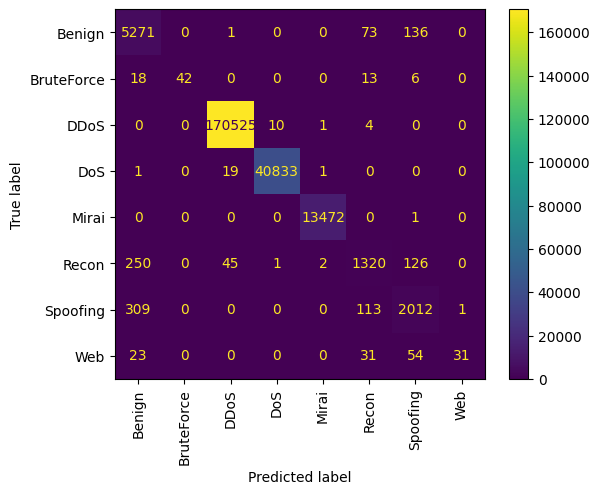

In [ ]:
print(classification_report(y_test, clf_rf_3.predict(x_test_3), digits=5))
ConfusionMatrixDisplay.from_estimator(clf_rf_3 , x_test_3, y_test,xticks_rotation='vertical')
plt.show()

In [ ]:
#all result
print('Random forest classification with all features')
print(classification_report(y_test, clf_rf.predict(x_test), digits=5))

print('Univariate feature selection and random forest classification (16 features)')
print(classification_report(y_test, clf_rf_2.predict(x_test_2), digits=5))

print('Recursive feature elimination and random forest classification (16 features) Optimal number of features with CV ')
print(classification_report(y_test, clf_rf_3.predict(x_test_3), digits=5))

Random forest classification with all features
              precision    recall  f1-score   support

      Benign    0.89284   0.96679   0.92835      5481
  BruteForce    1.00000   0.12658   0.22472        79
        DDoS    0.99946   0.99991   0.99968    170540
         DoS    0.99976   0.99931   0.99953     40854
       Mirai    0.99985   0.99866   0.99926     13473
       Recon    0.86846   0.76089   0.81112      1744
    Spoofing    0.86128   0.83121   0.84598      2435
         Web    0.84615   0.07914   0.14474       139

    accuracy                        0.99459    234745
   macro avg    0.93347   0.72031   0.74417    234745
weighted avg    0.99455   0.99459   0.99421    234745

Univariate feature selection and random forest classification (16 features)
              precision    recall  f1-score   support

      Benign    0.89837   0.96278   0.92946      5481
  BruteForce    1.00000   0.46835   0.63793        79
        DDoS    0.99959   0.99988   0.99973    170540
         